In [1]:
import os
import sys
import warnings
import datetime
import time
from time import strftime

import numpy as np
import pandas as pd
import pandas_profiling as pdf

from calendar import monthrange

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()



In [2]:
%time df = pd.read_pickle('data_clean.pickle')
df.tail()

CPU times: user 20 ms, sys: 36 ms, total: 56 ms
Wall time: 52.6 ms


,DATETIME,GVKEY,SYMBOL,IND_CODE,VALUE,VALUE_RANK,MOMENTUM,MOMENTUM_RANK,RET,RET3
2618785,2017-10-31,293884,INXN,18,0.181239,2,0.431529,8,0.048302,0.157079
2618883,2017-10-31,294524,LYB,41,0.246494,3,0.156449,4,0.045230,0.122867
2618920,2017-10-31,295786,CNHI,21,0.291927,4,0.590161,9,0.057452,0.115736
2619195,2017-10-31,315318,PAH,14,0.936775,9,0.440197,8,-0.040359,-0.110314
2619263,2017-10-31,316056,ALLE,47,0.014658,0,0.149037,4,-0.035619,-0.078062


In [3]:
df=df[["DATETIME", "GVKEY", "IND_CODE", "VALUE", "MOMENTUM","RET","RET3"]]
df.tail()

,DATETIME,GVKEY,IND_CODE,VALUE,MOMENTUM,RET,RET3
2618785,2017-10-31,293884,18,0.181239,0.431529,0.048302,0.157079
2618883,2017-10-31,294524,41,0.246494,0.156449,0.045230,0.122867
2618920,2017-10-31,295786,21,0.291927,0.590161,0.057452,0.115736
2619195,2017-10-31,315318,14,0.936775,0.440197,-0.040359,-0.110314
2619263,2017-10-31,316056,47,0.014658,0.149037,-0.035619,-0.078062


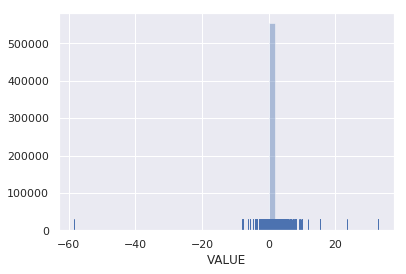

In [4]:
sns.distplot(df['VALUE'], bins=50, kde=False, rug=True);


In [5]:
# truncate extreme values until we get something approaching a normal histogram
# could also cap them at the extreme values
# fortunately not too many
print(df.shape)
tempdf = df[df["VALUE"] < 4.0]
print(tempdf.shape)
tempdf = tempdf[tempdf["VALUE"] > -1.0]
print(tempdf.shape)
df = tempdf
print(df.shape)

(577153, 7)
(576463, 7)
(575950, 7)
(575950, 7)


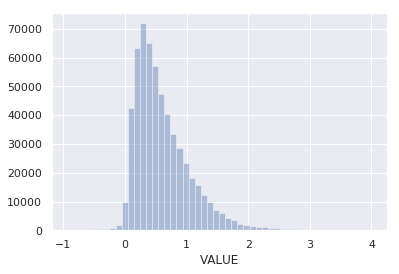

In [6]:
sns.distplot(df['VALUE'], bins=50, kde=False, rug=False);


In [7]:
print(df.shape)
tempdf = df[df["MOMENTUM"] < 4.0]
print(tempdf.shape)
tempdf = tempdf[tempdf["MOMENTUM"] > -2.0]
print(tempdf.shape)
df = tempdf
print(df.shape)

(575950, 7)
(574590, 7)
(574590, 7)
(574590, 7)


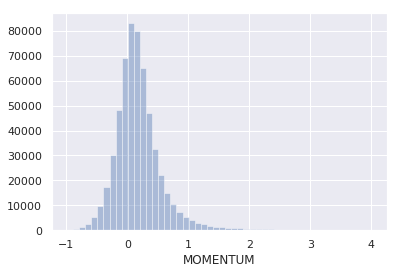

In [8]:
sns.distplot(df['MOMENTUM'], bins=50, kde=False, rug=False);


In [9]:
pdf.ProfileReport(df)

Number of variables,8
Number of observations,574590
Total Missing (%),0.0%
Total size in memory,35.1 MiB
Average record size in memory,64.0 B
Numeric,7
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0


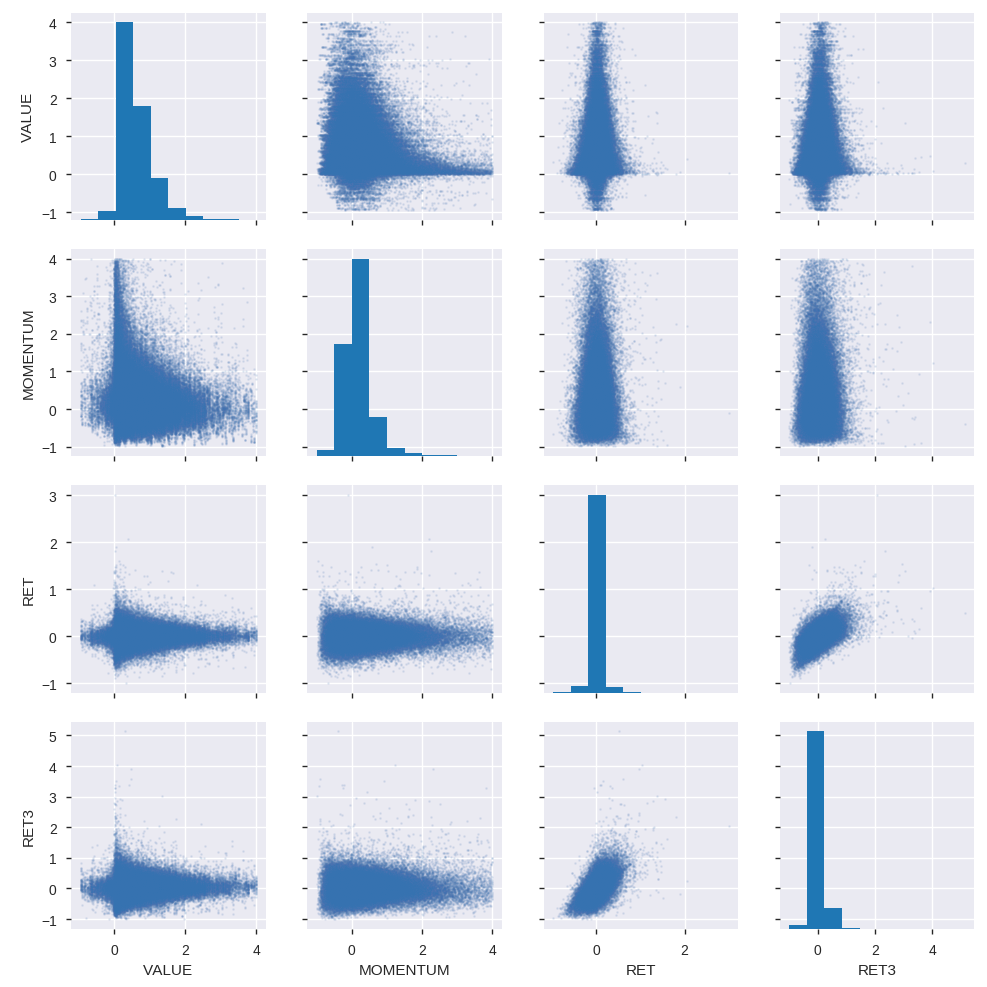

In [10]:
sns.pairplot(df[['VALUE', 'MOMENTUM', 'RET', 'RET3']], plot_kws=dict(s=1, alpha=0.1, edgecolor="b", linewidth=1));
# not particularly obvious relationships  

In [11]:
# save scrubbed dataframe
%time df.to_pickle("data.pickle")


CPU times: user 44 ms, sys: 52 ms, total: 96 ms
Wall time: 96 ms


In [12]:
# TODO: lagged correlations
# Loop for i in range(1,13)
 # create lagged df
 # correlation matrix of lagged variables
 # append autocorrelations to list
# bar lagged autocorrelations
# extra credit - matrix with autocorrelation bar along diagonal, lagged correlations off diagonal


In [13]:
# Do same but just keep ranks for classification, no scrubbing outliers
%time df = pd.read_pickle('data_clean.pickle')
df.tail()

CPU times: user 64 ms, sys: 32 ms, total: 96 ms
Wall time: 92.7 ms


,DATETIME,GVKEY,SYMBOL,IND_CODE,VALUE,VALUE_RANK,MOMENTUM,MOMENTUM_RANK,RET,RET3
2618785,2017-10-31,293884,INXN,18,0.181239,2,0.431529,8,0.048302,0.157079
2618883,2017-10-31,294524,LYB,41,0.246494,3,0.156449,4,0.045230,0.122867
2618920,2017-10-31,295786,CNHI,21,0.291927,4,0.590161,9,0.057452,0.115736
2619195,2017-10-31,315318,PAH,14,0.936775,9,0.440197,8,-0.040359,-0.110314
2619263,2017-10-31,316056,ALLE,47,0.014658,0,0.149037,4,-0.035619,-0.078062


In [14]:
df=df[["DATETIME", "GVKEY", "IND_CODE", "VALUE_RANK", "MOMENTUM_RANK","RET","RET3"]]
df.columns=["DATETIME", "GVKEY", "INDUSTRY", "VALUE_RANK", "MOMENTUM_RANK","RET","RET3"]
df.tail()

,DATETIME,GVKEY,INDUSTRY,VALUE_RANK,MOMENTUM_RANK,RET,RET3
2618785,2017-10-31,293884,18,2,8,0.048302,0.157079
2618883,2017-10-31,294524,41,3,4,0.045230,0.122867
2618920,2017-10-31,295786,21,4,9,0.057452,0.115736
2619195,2017-10-31,315318,14,9,8,-0.040359,-0.110314
2619263,2017-10-31,316056,47,0,4,-0.035619,-0.078062


In [15]:
%time df.to_pickle("rank.pickle")


CPU times: user 44 ms, sys: 80 ms, total: 124 ms
Wall time: 122 ms
